In [6]:
# import the data
import sinter
import matplotlib.pyplot as plt
from main.codes.tic_tac_toe.HoneycombCode import HoneycombCode
from main.codes.tic_tac_toe.FloquetColourCode import FloquetColourCode
import os
from scripts.line_fit_plots import *
from scripts.threshold_plot import *


In [7]:
honeycomb_data = dict()
fcc_data = dict()
for file in os.listdir('../data/'):
    print(file)
    new_samples = sinter.stats_from_csv_files('../data/'+file)
    if new_samples[0].json_metadata['code'] == 'FloquetColourCode':
        fcc_data[new_samples[0].json_metadata['bias']] = new_samples

    elif new_samples[0].json_metadata['code'] == 'Honeycomb':
        honeycomb_data[new_samples[0].json_metadata['bias']] = new_samples


FloquetColourCode_bias_4.csv
FloquetColourCode_bias_32.csv
FloquetColourCode_bias_16.csv
Honeycomb_bias_128.csv
Honeycomb_bias_32.csv
FloquetColourCode_bias_128.csv
FloquetColourCode_bias_64.csv
Honeycomb_bias_4.csv
FloquetColourCode_bias_2.csv
Honeycomb_bias_8.csv
Honeycomb_bias_64.csv
Honeycomb_bias_16.csv
FloquetColourCode_bias_8.csv
Honeycomb_bias_2.csv


32


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

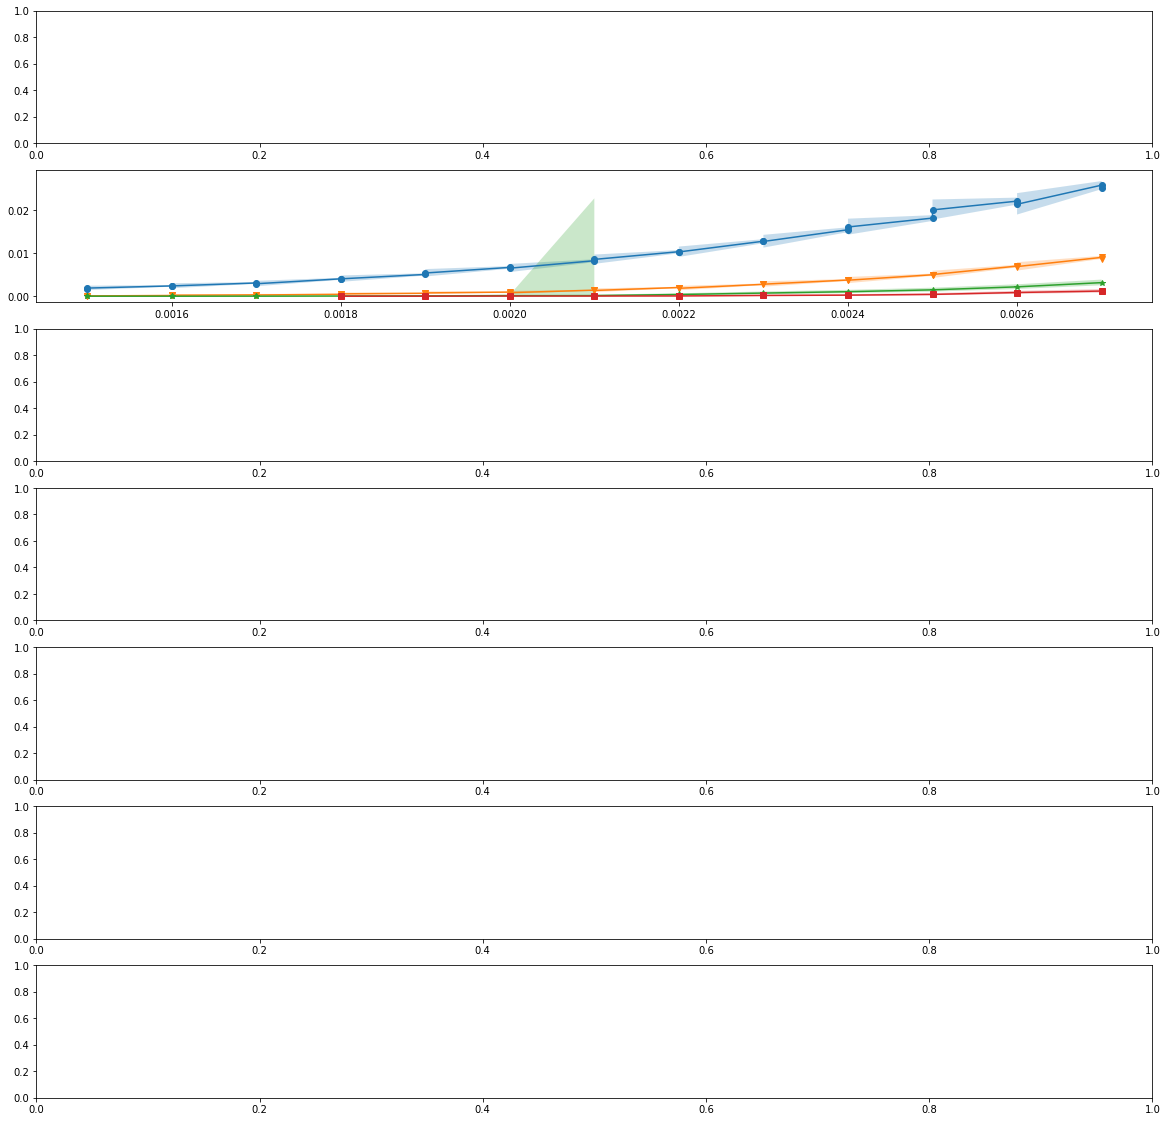

In [15]:
thresholds_fcc = dict()
fig, ax = plt.subplots(len(honeycomb_data.keys()),1, figsize=(20,20))
#code_constructor = FloquetColourCode
for index,bias in enumerate(honeycomb_data.keys()):
    if bias < 64:
        sinter.plot_error_rate(
                    ax=ax[index],
                    stats=fcc_data[bias],
                    group_func=lambda stat: f"FloquetColourCode, d={stat.json_metadata['distance']}",
                    x_func=lambda stat: stat.json_metadata['p'])
        print(bias)
        samples_fcc = sinter.stats_from_csv_files("../data/FloquetColourCode_bias_"+str(bias)+".csv")
        thresholds_fcc[bias] = get_one_threshold(samples_fcc, 1)

        ax[index].axvline(x=thresholds_fcc[bias], color="black", linestyle="dashed")
        ax[index].legend()
        ax[index].loglog()


[]

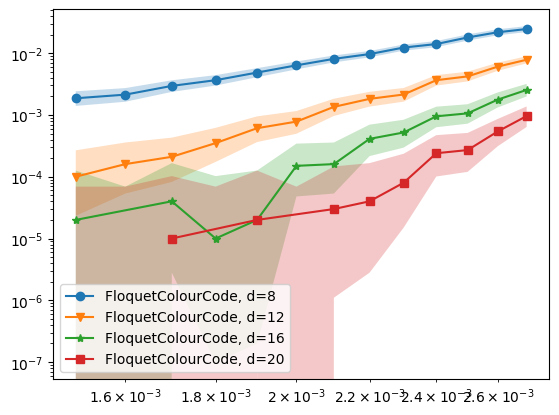

In [68]:
fig, ax = plt.subplots(1, 1)
code_constructor = FloquetColourCode

sinter.plot_error_rate(
            ax=ax,
            stats=fcc_data[64],
            group_func=lambda stat: f"{code_constructor.__name__}, d={stat.json_metadata['distance']}",
            x_func=lambda stat: stat.json_metadata['p'])
ax.legend()
ax.loglog()


[]

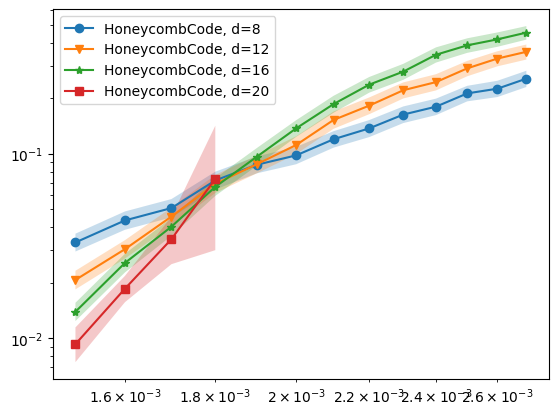

In [69]:
# get some teraquop plots! 
fig, ax = plt.subplots(1, 1)
code_constructor = HoneycombCode

sinter.plot_error_rate(
            ax=ax,
            stats=honeycomb_data[64],
            group_func=lambda stat: f"{code_constructor.__name__}, d={stat.json_metadata['distance']}",
            x_func=lambda stat: stat.json_metadata['p'])
ax.legend()
ax.loglog()

